Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [1]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
heart_data = pd.read_csv(url)

# Display the first few rows of the dataset to inspect its structure
print(heart_data.head())
# Check for missing values
print(heart_data.isnull().sum())

# Impute missing values (assuming numerical features)
heart_data.fillna(heart_data.mean(), inplace=True)

# Check again for missing values
print(heart_data.isnull().sum())
# Encode categorical variable 'sex'
heart_data = pd.get_dummies(heart_data, columns=['sex'], drop_first=True)
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal

# Q2. Split the dataset into a training set (70%) and a test set (30%).


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (212, 13) (212,)
Test set shape: (91, 13) (91,)


# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

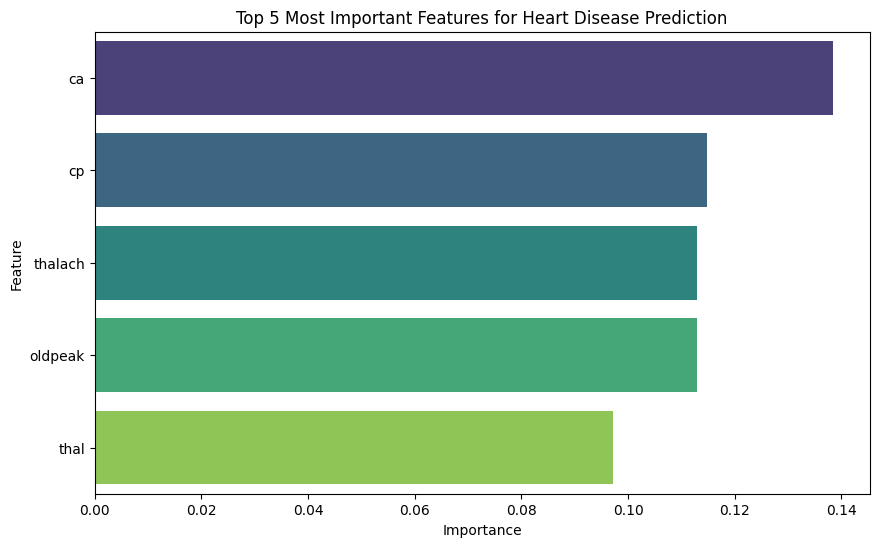

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained random forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = feature_importance_df.head(5)

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the random forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_classifier.predict(X_test)

# Calculate and display the evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nEvaluation Metrics for Best Model:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Evaluation Metrics for Best Model:
Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608


# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have X_train, X_test, y_train, y_test defined

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the random forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Fit the best model to the training data
best_rf_classifier.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_best = best_rf_classifier.predict(X_test)

# Calculate and display the evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nEvaluation Metrics for Best Model:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)

# Compare with the default model
y_pred_default = best_rf_classifier.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("\nEvaluation Metrics for Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Evaluation Metrics for Best Model:
Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608

Evaluation Metrics for Default Model:
Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the  decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier):
    h = .02  # Step size in the mesh

    # Create a meshgrid for feature 1 and feature 2
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the labels for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Scatter plot of the data points
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    # Legend for the scatter plot
    plt.legend(*scatter.legend_elements(), title="Classes")

    # Set plot labels
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    # Show the plot
    plt.show()

# Create an arbitrary dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'BloodPressure': [120, 130, 125, 140, 135, 130, 145, 150],
    'Cholesterol': ['Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'High', 'Normal'],
    'Exercise': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Condition': [0, 1, 0, 1, 0, 1, 1, 0]  # 0: No Condition, 1: Condition present
}

df = pd.DataFrame(data)

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Cholesterol', 'Exercise'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Condition', axis=1)
y = df['Condition']

# Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier on the training set
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and display the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
